In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [2]:
os.listdir('dataset/Titanic')

['train_data.csv', 'test_data.csv']

In [3]:
input_ads = pd.read_csv('dataset/Titanic/train_data.csv')
input_ads.drop(columns=['Unnamed: 0','Title_1','Title_2','Title_3','Title_4'],inplace=True) #Dropping un-necessary columns
#-----------------------------------------------------------------
print(input_ads.shape)
input_ads.head()

# df_train = pd.read_csv('dataset/Titanic/train_data.csv', index_col=0)
# df_test = pd.read_csv('dataset/Titanic/test_data.csv', index_col=0)

(792, 12)


,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
0,1,0,1,0.2750,0.014151,0,0,1,0.1,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,0,0,1


In [4]:
pd.DataFrame(input_ads.isnull().sum()).T

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
input_ads.describe()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.185606,0.092172,0.720960
std,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.389034,0.289451,0.448811
min,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,1.000000
max,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Total survived vs not-survived split in the training data
input_ads['Survived'].value_counts()

0    486
1    306
Name: Survived, dtype: int64

In [7]:
target = 'Survived' #To predict

#--------------------------------------------------------------------------------
#Splitting into X & Y datasets (supervised training)
X = input_ads[[cols for cols in list(input_ads.columns) if target not in cols]]
y = input_ads[target]

#--------------------------------------------------------------------------------
#Since test data is already placed in the input folder separately, we will just import it
test_ads = pd.read_csv('dataset/Titanic/test_data.csv')
test_ads.drop(columns=['Unnamed: 0','Title_1','Title_2','Title_3','Title_4'],inplace=True) #Dropping un-necessary columns

#Splitting into X & Y datasets (supervised training)
X_test = test_ads[[cols for cols in list(test_ads.columns) if target not in cols]]
y_test = test_ads[target]

print('Train % of total data:',100 * X.shape[0]/(X.shape[0] + X_test.shape[0]))
#--------------------------------------------------------------------------------
#Manipulation of datasets for convenience and consistency
X_arr = np.array(X)
X_test_arr = np.array(X_test)

y_arr = np.array(y).reshape(X_arr.shape[0],1)
y_test_arr = np.array(y_test).reshape(X_test_arr.shape[0],1)

#--------------------------------------------------------------------------------
#Basic Summary
print(X_arr.shape)
print(X_test_arr.shape)
print(y_arr.shape)

Train % of total data: 88.78923766816143
(792, 11)
(100, 11)
(792, 1)


In [8]:
from sklearn.preprocessing import StandardScaler

#----------------------------------------------------------
scaler = StandardScaler()
X_arr = scaler.fit_transform(X_arr)
X_test_arr = scaler.transform(X_test_arr)

#----------------------------------------------------------
X_arr[0:3]

array([[-1.72986525,  0.73746841, -0.57243072, -0.50063632, -0.56762987,
        -0.51298918,  0.90823168,  0.07360462, -0.47739604, -0.31863757,
         0.62212561],
       [-1.72549138, -1.35599029,  0.65538585,  0.73777138,  1.76171137,
        -0.51298918, -1.10104065,  0.07360462,  2.0946969 , -0.31863757,
        -1.60739242],
       [-1.72111752, -1.35599029, -0.26547658, -0.48758178, -0.56762987,
        -0.51298918,  0.90823168, -0.57411602, -0.47739604, -0.31863757,
         0.62212561]])

In [9]:
import tensorflow as tf
import keras
import tensorflow.keras.models
import tensorflow.keras.layers as tfl
from tensorflow.keras import Input
from tensorflow.keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization

In [10]:
#Defining hyper-parameters for ANN
#--------------------------------------------------------------------------------------------------------------------------
n_hidden = 2       #No of hidden layers
alpha = 0.003      #Learning_rate
n_iters = 20      #Total epochs
hidden_size_list = [0,3,1]               #first element will be 0 and not counted in hidden layers
activation_list = [0,'relu','sigmoid']   #first element will be 0 and not counted in hidden layers
batch_size = 25    #Batch wise gradient descent

In [11]:
def ANN_keras(x):
    
    input_ = tfl.Input(shape=(x.shape[1],))
    
    x = tfl.Dense(3,activation='relu', name = 'Dense_3')(input_) #Layer 1
    
    preds = tfl.Dense(1, activation="sigmoid", name="pred")(x) #Output layer
    
    model = Model(input_, preds, name="ANN_keras")
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=alpha),
                 metrics=['accuracy']) #Stochastic Gradient Descent with specified alpha
    
    return model
    
model = ANN_keras(X_arr)
model.summary()

Model: "ANN_keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 Dense_3 (Dense)             (None, 3)                 36        
                                                                 
 pred (Dense)                (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_arr,y_arr, epochs=n_iters, batch_size=batch_size,
                    validation_data = (X_test_arr,y_test_arr), verbose=1)

Epoch 1/20
32/32 [==============================] - 1s 5ms/step - loss: 0.8985 - accuracy: 0.3712 - val_loss: 1.1802 - val_accuracy: 0.2800
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.3826 - val_loss: 1.1186 - val_accuracy: 0.2800
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8250 - accuracy: 0.3952 - val_loss: 1.0653 - val_accuracy: 0.2800
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.4192 - val_loss: 1.0192 - val_accuracy: 0.2700
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.4318 - val_loss: 0.9791 - val_accuracy: 0.2800
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.4659 - val_loss: 0.9442 - val_accuracy: 0.3000
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.4886 - val_loss: 0.9137 - val_accuracy: 0.3200
Epoch 8/20
32/32 [==

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

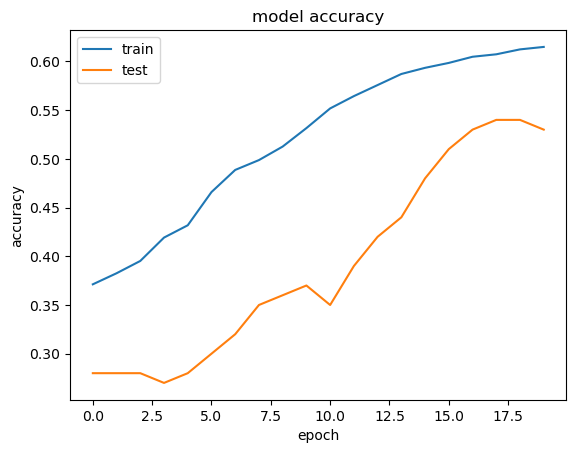

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

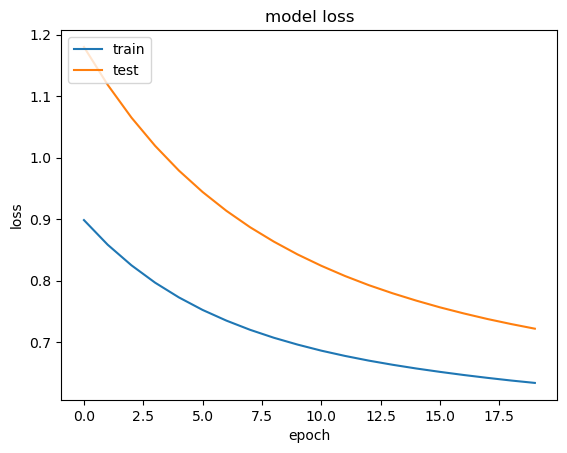

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
keras_pred = model.predict(X_test_arr)
keras_pred = np.where(keras_pred>0.5,1,0)

#print(np.unique(keras_pred))
print('#--------------------- Evaluation ----------------------#')
#Evaluation of the predictions
print('ROC AUC of test set :',roc_auc_score(y_test_arr.ravel(),keras_pred.ravel()))
print('Accuracy of test set :',accuracy_score(y_test_arr.ravel(),keras_pred.ravel()))

4/4 [==============================] - 0s 820us/step
#--------------------- Evaluation ----------------------#
ROC AUC of test set : 0.45052083333333337
Accuracy of test set : 0.53
